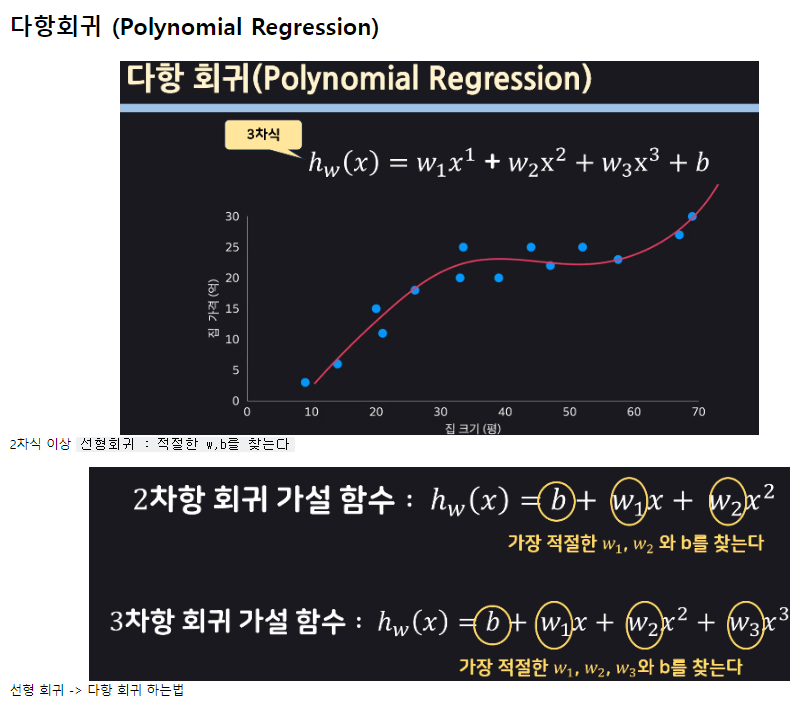
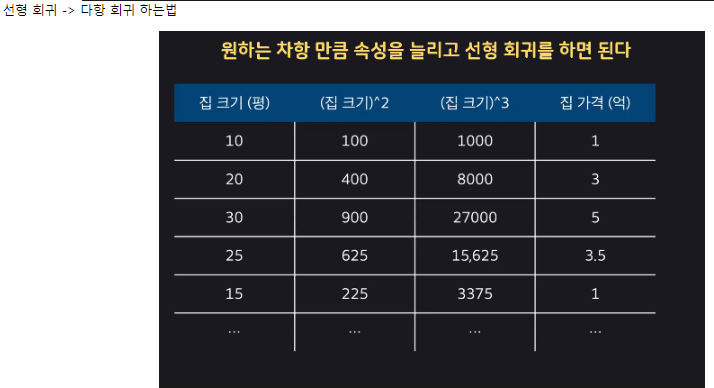

### 보스턴 집 값 데이터 실습
- 보스턴 집 값 데이터를 활용하여 다항회귀를 구현해보자

### 다항회귀
- 선형 모델의 수식에서 입력 특성에 2차 이상의 항이 포함된 경우  
- 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어 성능개선의 여지가 있다.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 한글이 안깨지도록 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [68]:
# 원래 보스턴 집값 데이터를 제공했었는데 인종차별 관련 이슈로 삭제됨
# from sklearn.datasets import load_boston

In [69]:
# 그래서 따로 불러와준다 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows = 22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2] # 1::2 -> 1부터 증가하는데 2씩 증가해라

In [70]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [71]:
# data가 numpy 배열로 되어있음 -> pd.DataFrame 형태로 바꿔준다
boston = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)  --> 우리가 찾고자하는 목표  ---> target이 갖고있음

In [72]:
boston.shape

(506, 13)

In [73]:
# 훈련용 데이터와 평가용 데이터로 분리 -> train_test_split()
X_train, X_test, y_train, y_test = train_test_split(boston, target, test_size = 0.3)

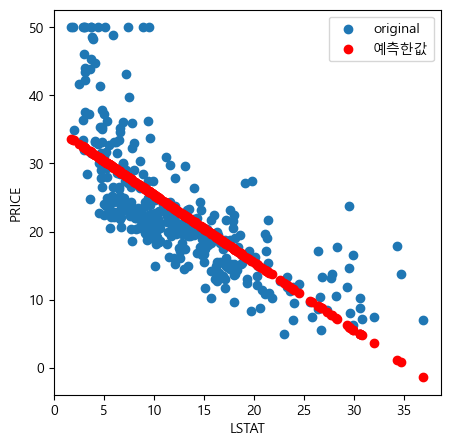

In [74]:
# 데이터 분포 확인
plt.figure(figsize = (5,5))
plt.scatter(X_train['LSTAT'], y_train, label = 'original')

# 선형회귀 모델 학습
LSTAT_model = LinearRegression() # 모델 생성
LSTAT_model.fit(X_train[['LSTAT']], y_train) # 모델 학습 -> LSTAT 컬럼만 문제데이터로 -> 중요!!!) 문제데이터는 2차원으로!!

# 선형모델의 예측결과 확인
pre = LSTAT_model.predict(X_train[['LSTAT']]) # 문제데이터 2차원으로
plt.scatter(X_train['LSTAT'], pre, label = '예측한값', color = 'red')

plt.legend()
plt.xlabel('LSTAT') # 하위계층
plt.ylabel('PRICE')

plt.show()

### 다항회귀 구현하기
1. 특성확장을 통해서 다항식을 만들어준다
2. sklearn의 PolynomialFeatures 를 이용한다.

In [107]:
# 방법 1
# 특성확장
X_train['LSTAT x LSTAT'] = X_train['LSTAT']**2

In [108]:
# 모델 학습
LSTAT_model2 = LinearRegression()
LSTAT_model2.fit(X_train[['LSTAT', 'LSTAT x LSTAT']], y_train) # (LSTAT열과 LSTAT x LSTAT열)  1차항과 2차항이 섞여있음

LinearRegression()

In [109]:
# 모델 예측
pre2 = LSTAT_model2.predict(X_train[['LSTAT', 'LSTAT x LSTAT']])

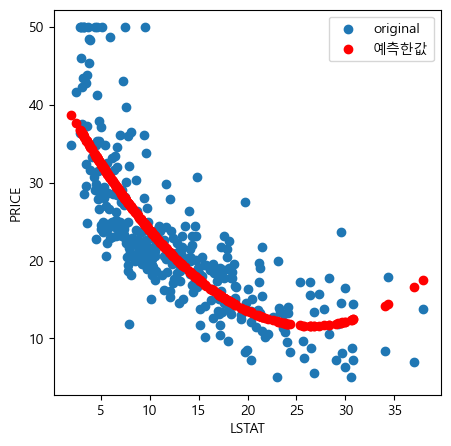

In [110]:
# 데이터 분포 확인
plt.figure(figsize = (5,5))
plt.scatter(X_train['LSTAT'], y_train, label = 'original')

plt.scatter(X_train['LSTAT'], pre2, label = '예측한값', color = 'red')

plt.legend()
plt.xlabel('LSTAT') # 하위계층
plt.ylabel('PRICE')

plt.show()

In [111]:
# 방법 2
# 다항변형기(PolynomialFeatures)를 사용하여 다항회귀 구현

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
# 다항변형기 생성
polynomial_transformer = PolynomialFeatures(2) # 2 -> 2차원

In [114]:
# 갖고있는 데이터를 변형 -> .fit_transform(문제데이터)
polynomial_data = polynomial_transformer.fit_transform(boston)

In [115]:
polynomial_data.shape

(506, 105)

In [116]:
# 특성확장 후 컬럼명 확인 -> .get_feature_names_out(특성확장하기 전 데이터의 컬럼값)
polynomial_featurest_names = polynomial_transformer.get_feature_names_out(boston.columns)
polynomial_featurest_names

array(['1', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN',
       'CRIM INDUS', 'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE',
       'CRIM DIS', 'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B',
       'CRIM LSTAT', 'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM',
       'ZN AGE', 'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B',
       'ZN LSTAT', 'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM',
       'INDUS AGE', 'INDUS DIS', 'INDUS RAD', 'INDUS TAX',
       'INDUS PTRATIO', 'INDUS B', 'INDUS LSTAT', 'CHAS^2', 'CHAS NOX',
       'CHAS RM', 'CHAS AGE', 'CHAS DIS', 'CHAS RAD', 'CHAS TAX',
       'CHAS PTRATIO', 'CHAS B', 'CHAS LSTAT', 'NOX^2', 'NOX RM',
       'NOX AGE', 'NOX DIS', 'NOX RAD', 'NOX TAX', 'NOX PTRATIO', 'NOX B',
       'NOX LSTAT', 'RM^2', 'RM AGE', 'RM DIS', 'RM RAD', 'RM TAX',
       'RM PTRATIO', 'RM B', 'RM LSTAT', 'AGE^2', 'AGE DIS', 'AGE RAD',
       'AGE TAX', 'AGE PTRATIO', 'AGE 

In [117]:
# 문제 데이터 재생성 - polynomial을 진행한 데이터를 활용해 데이터프레임 생성
X = pd.DataFrame(polynomial_data, columns = polynomial_featurest_names)
X

1     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  ...  \
0    1.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  ...   
1    1.0  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  ...   
2    1.0  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  ...   
3    1.0  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  ...   
4    1.0  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  ...   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  1.0  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  ...   
502  1.0  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  ...   
503  1.0  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  ...   
504  1.0  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  ...   
505  1.0  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  ...   

       TAX^2  TAX PTRATIO      TAX B  TAX LSTAT  PTRATIO^2  PTRATIO B  \
0    87616.0       4528.8  117482.40    1474.08     234.09   6072.570   
1    58564.0       4307.6   96049.80    2211.88     316.84   7064.820   
2    58564.0       4307.6   95064.86     975.26     316.84   6992.374   
3    49284.0       4151.4   87607.86     652.68     349.69   7379.581   
4    49284.0       4151.4   88111.80    1183.26     349.69   7422.030   
..       ...          ...        ...        ...        ...        ...   
501  74529.0       5733.0  107013.27    2639.91     441.00   8231.790   
502  74529.0       5733.0  108353.70    2478.84     441.00   8334.900   
503  74529.0       5733.0  108353.70    1539.72     441.00   8334.900   
504  74529.0       5733.0  107411.85    1769.04     441.00   8262.450   
505  74529.0       5733.0  108353.70    2151.24     441.00   8334.900   

     PTRATIO LSTAT          B^2    B LSTAT  LSTAT^2  
0           76.194  157529.6100  1976.5620  24.8004  
1          162.692  157529.6100  3627.6660  83.5396  
2           71.734  154315.4089  1583.1049  16.2409  
3           54.978  155732.8369  1160.2122   8.6436  
4           99.671  157529.6100  2115.4770  28.4089  
..             ...          ...        ...      ...  
501        203.070  153656.1601  3790.5433  93.5089  
502        190.680  157529.6100  3603.8520  82.4464  
503        118.440  157529.6100  2238.5160  31.8096  
504        136.080  154802.9025  2549.5560  41.9904  
505        165.480  157529.6100  3127.5720  62.0944  

[506 rows x 105 columns]

여기서 '1'이라는 값은 가설함수 h(x) = wx + b * 1 에서 사실 1이 곱해져있어서 나오는 값..

polynomial_transformer = PolynomialFeatures(2, `include_bias=False`) 로 적으면 1 컬럼이 나오지 않음

In [118]:
# 훈련세트와 테스트세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3)

In [119]:
# 모델 생성
lr_model = LinearRegression()

In [120]:
# 학습
lr_model.fit(X_train, y_train)

LinearRegression()

In [121]:
# 예측
pre = lr_model.predict(X_test)
pre

array([21.8542892 , 31.97593241, 22.76207374, 11.34892241, 35.62753876,
       13.3056613 , 22.06577392, 47.40328781, 11.2335887 , 13.33185249,
       16.45096329, 26.63164241, 25.69701249, 17.96805232, 23.01133829,
       29.0795726 , 20.09708908, 31.53393215, 37.51542514, 24.47593171,
       22.03554707, 13.67703789, 23.113727  , 22.84285464, 17.60357176,
       19.9420612 , 24.83839175, 18.82903059, 28.57534439,  9.35422193,
       26.8829356 , 12.57714712, 17.56402647, 34.35575162, 19.22570397,
       17.59357101, 14.77048578, 13.24159959, 14.56295785, 23.45815444,
       11.77024738,  9.81612525, 18.00194527, 27.00518871, 13.06051272,
       16.66317771, 23.5469837 , 32.76653155, 31.19464393, 16.60213328,
       10.90639777, 14.93369979, 22.26155126, 31.23466375, 21.57348719,
       23.83385613, 22.13637048, 13.46189509, 34.17334675, 27.8055812 ,
       22.50288638, 27.91557994, 37.00896813, 10.46305446, 23.64178793,
       42.59768662, 13.22043932,  5.72500106, 15.14410141, 27.60

In [122]:
# 평가 (mse = 평균 제곱 오차)
mse = mean_squared_error(pre, y_test)
print(mse)
# 평가 (RMSE = 평균 제곱근 오차)
rmse = mse **0.5
print(rmse) # 예측값들이 실제값들과 평균적으로 얼마나 떨어져있다.

12.608898769368833
3.550901120753552


In [123]:
# 가중치 (w) 알아보기 -> .coef_
lr_model.coef_
# w1x1 ... 엄청 많이 세부적으로 나눠서 w가 커졌다...(?)

array([-2.09714731e-07, -1.14585587e+01,  7.22849195e-01, -3.20529991e+00,
        2.12701765e+01,  1.20393948e+02,  1.12006999e+01,  8.17463706e-01,
       -1.11925126e+01,  7.97101786e-01, -4.08322600e-02,  4.82310218e+00,
        1.69524837e-01,  1.17114730e+00, -1.20593747e-03,  2.97007628e-01,
        1.80278514e-02,  2.23241417e+00, -2.01508036e+00,  1.16148471e-01,
       -5.73527441e-03, -2.59594389e-01, -3.56901505e-01,  1.82704272e-02,
        4.25549357e-01,  9.00711231e-05,  2.08338511e-02, -2.05062669e-04,
       -1.21938080e-03, -1.09276730e-01, -8.58465330e-01,  1.44433050e-02,
        3.22556829e-04, -1.52268281e-02, -8.45448675e-03,  5.58043297e-04,
       -1.57155578e-02, -4.17340661e-04, -5.44293805e-03,  3.41446366e-02,
       -3.03625997e-01,  2.12018324e+00,  1.97736734e-01,  3.01228550e-03,
        8.55616507e-02, -2.00619750e-02,  9.84721685e-04, -6.27640233e-02,
        2.06902545e-03, -1.21334778e-02,  2.12701759e+01, -2.80098711e+01,
       -2.89843059e+00, -

In [124]:
# bias 확인
lr_model.intercept_

-124.48473870948199

### 다항회귀가 선형회귀보다 정말 좋은가?
# 선형회귀 vs 다항회귀

#### 단순 선형회귀 (1차항만 갖고있는)

In [94]:
# 데이터 다시 불러오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows = 22, header = None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2] # 1::2 -> 1부터 증가하는데 2씩 증가해라


In [96]:
boston = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(boston, target, test_size = 0.3)

In [99]:
lr_model = LinearRegression()

In [100]:
# 훈련
lr_model.fit(X_train, y_train)

LinearRegression()

In [102]:
# 예측
pre = lr_model.predict(X_test)
pre

array([13.1408405 , 14.43203995, 22.35354193, 12.77211824, 17.46521658,
       20.8613884 , 20.84172643, 21.52225773, 27.73682305, 19.2045477 ,
       19.08638346,  5.83389033, 19.64139416, 21.41523364, 37.25795378,
       38.83648112, 23.54033403, 28.30799686, 26.70041635, 31.70439409,
       17.81093803, 15.22622574, 11.06509578, 30.93029889, 24.91738623,
       24.8166206 , 30.84818311, 31.16243891, 31.06996965, 31.86557795,
       19.36281672,  7.42859373, 19.09852553, 23.18142093, 40.19785385,
       15.4102007 ,  6.08982443, 30.46934955, 22.31644036, 36.22572861,
       28.67667027, 22.20278671,  9.17749286, 24.19847179, 37.74869267,
       22.41758072, 31.56168278, 18.92717262, 35.31820929, 12.74344725,
       11.27474368, 16.52003408, 24.03317875, 26.06395942, 23.60827615,
       26.12445678, 16.94376072, 22.50111562,  6.98886478, 25.1597803 ,
       16.48661514, 20.50023021, 22.23590025, 22.63435122, 23.26770922,
       20.89200857, 36.16519447, 18.32960995,  7.7983907 ,  3.74

In [105]:
# 평가(mse, rmse)
# mse (mean squared error) - 평균 제곱 오차
mse = mean_squared_error(pre, y_test)
print("단순 선형회귀 mse값 : ", mse)

# rmse - 평균 제곱근 오차
rsme = mse**0.5
print("단순 선형회귀 rmse값 :", rsme)

단순 선형회귀 mse값 :  22.786259447776793
단순 선형회귀 rmse값 : 4.773495516681334


#### 다항회귀 mse / rmse 값
### 2차항 의 경우
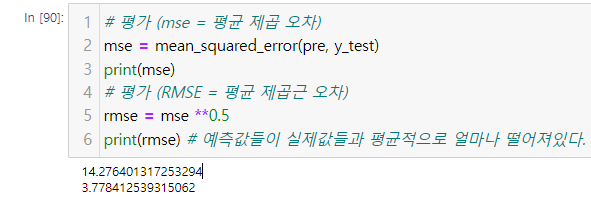
### 5차항의 경우
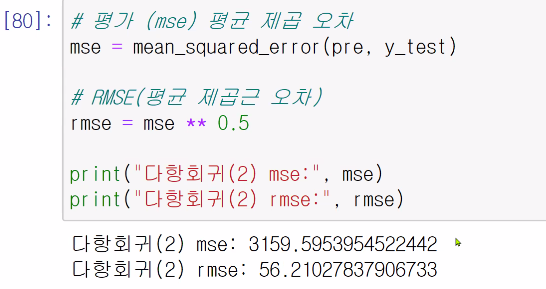
#### 5차식 -> 더 fit 해서 더 잘맞았어야 되지 않나?
#### 이유 : `과대 적합` : 훈련데이터에 너무  fit 하게 맞춰져있어서 테스트데이터에서 낮은 결과가 나옴
## 해결방법 : `규제`

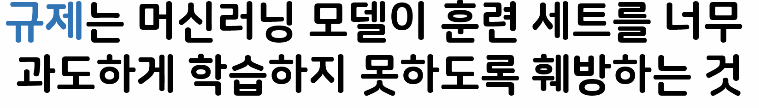
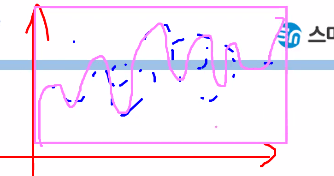
파란색 : 훈련데이터 / 핑크색 : 예측데이터 -> 고차항으로 갈수록 너무 훈련데이터에만 맞춰가려고함(과대적합)
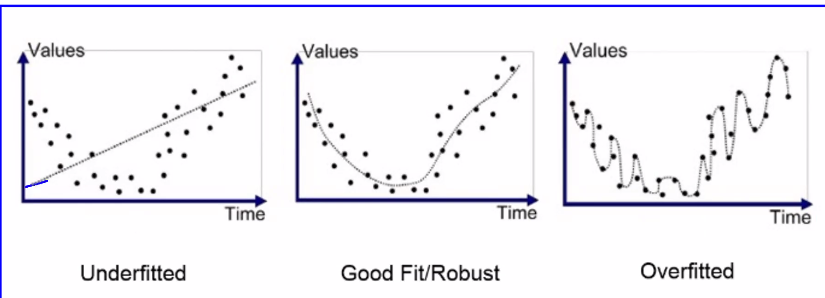
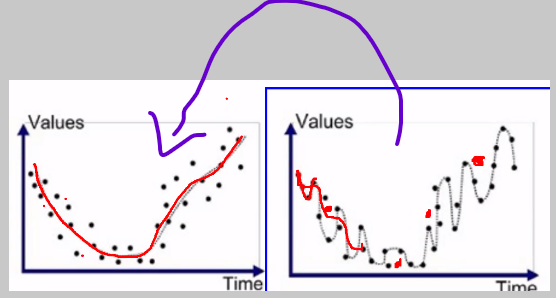
규제를 통해 구불구불한 것을 평평하게 펴주는 것

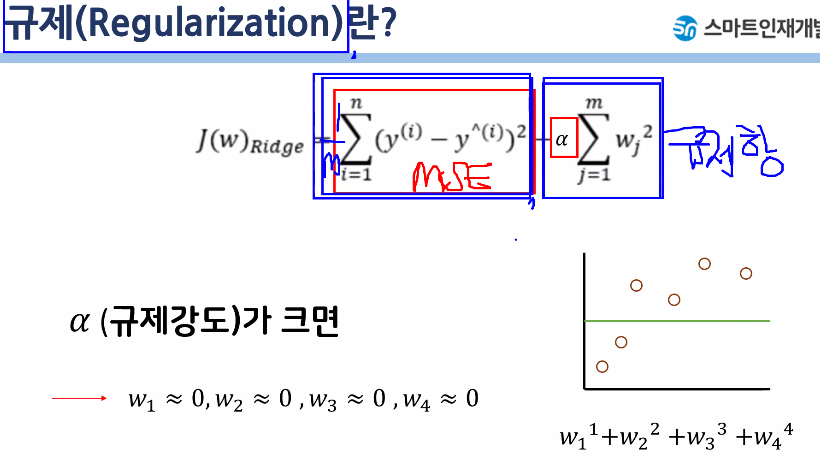

손실함수 J(w) = MSE + `규제`항
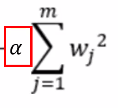
알파 = 0 -> 규제가 없음  

`알파(규제강도) 를 높여서` `w값을 엄청 낮춘다` 
w값이 작아질수록 -> 가중치가 적어져서 -> 데이터에 덜 fit하게 되어 -> 예측 그래프가 펴짐  
너무 작아지면 `과소적합`이 될수도 있음

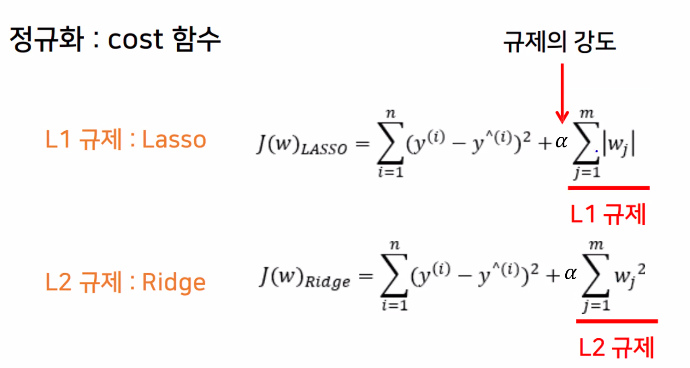
L1 과 L2의 차이점  
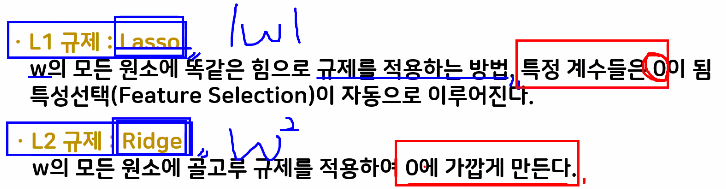
Lasso / Ridge - 모델의 이름  
L1(Lasso) - 계수를 0으로 만들수 있음 -> 그 특성을 아예 고려하지 않겠다 ( 특성선택)  
L2(Ridge) - 0에 가깝게만 만들수있음 -> 모든 특성을 사용
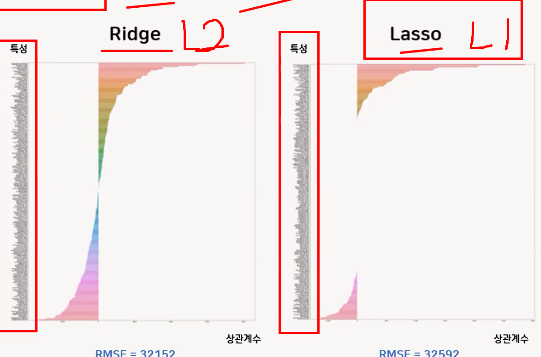
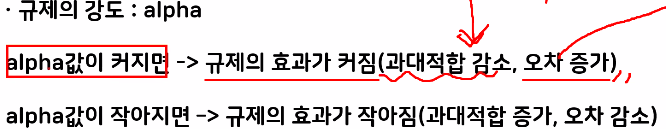

###  규제
- L1(Lasso), L2(Ridge) 모델 활용하기

In [125]:
X_train # 다항회귀

1     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD  ...  \
128  1.0  0.32543   0.0  21.89   0.0  0.624  6.431  98.8  1.8125   4.0  ...   
172  1.0  0.13914   0.0   4.05   0.0  0.510  5.572  88.5  2.5961   5.0  ...   
123  1.0  0.15038   0.0  25.65   0.0  0.581  5.856  97.0  1.9444   2.0  ...   
200  1.0  0.01778  95.0   1.47   0.0  0.403  7.135  13.9  7.6534   3.0  ...   
362  1.0  3.67822   0.0  18.10   0.0  0.770  5.362  96.2  2.1036  24.0  ...   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...   ...  ...   
278  1.0  0.07978  40.0   6.41   0.0  0.447  6.482  32.1  4.1403   4.0  ...   
199  1.0  0.03150  95.0   1.47   0.0  0.403  6.975  15.3  7.6534   3.0  ...   
148  1.0  2.33099   0.0  19.58   0.0  0.871  5.186  93.8  1.5296   5.0  ...   
192  1.0  0.08664  45.0   3.44   0.0  0.437  7.178  26.3  6.4798   5.0  ...   
260  1.0  0.54011  20.0   3.97   0.0  0.647  7.203  81.8  2.1121   5.0  ...   

        TAX^2  TAX PTRATIO      TAX B  TAX LSTAT  PTRATIO^2  PTRATIO B  \
128  190969.0       9264.4  173445.30    6725.43     449.44   8414.280   
172   87616.0       4913.6  117482.40    4348.24     275.56   6588.540   
123   35344.0       3590.8   69618.28    4777.08     364.81   7072.921   
200  161604.0       6834.0  154488.60    1788.90     289.00   6533.100   
362  443556.0      13453.2  253606.14    6786.54     408.04   7691.958   
..        ...          ...        ...        ...        ...        ...   
278   64516.0       4470.4  100812.60    1826.26     309.76   6985.440   
199  161604.0       6834.0  159553.80    1833.12     289.00   6747.300   
148  162409.0       5924.1  143866.97   11412.96     216.09   5247.753   
192  158404.0       6049.6  155415.02    1142.26     231.04   5935.448   
260   69696.0       3432.0  103699.20    2531.76     169.00   5106.400   

     PTRATIO LSTAT          B^2     B LSTAT   LSTAT^2  
128        326.268  157529.6100   6108.2910  236.8521  
172        243.854  157529.6100   5830.4610  215.7961  
123        485.331  137129.4961   9409.5771  645.6681  
200         75.650  147686.4900   1710.1350   19.8025  
362        205.838  145001.0241   3880.2501  103.8361  
..             ...          ...         ...       ...  
278        126.544  157529.6100   2853.7110   51.6961  
199         77.520  157529.6100   1809.8640   20.7936  
148        416.304  127441.8601  10109.9568  802.0224  
192         43.624  152482.4401   1120.7063    8.2369  
260        124.670  154291.8400   3766.9520   91.9681  

[354 rows x 105 columns]

#### L2규제(Ridge)

In [126]:
from sklearn.linear_model import Ridge

In [127]:
ridge_model = Ridge() # 알파 = 규제강도 (기본값 = 1.0 )

In [128]:
ridge_model.fit(X_train, y_train)

Ridge()

In [131]:
# 예측
ridge_pre = ridge_model.predict(X_test)
ridge_pre

array([21.53046561, 31.68157319, 23.03785386, 12.80232857, 44.51552084,
       14.41873254, 22.52917829, 47.05934584, 11.59119138, 13.34522609,
       16.34021239, 26.35275761, 25.55576279, 18.12689162, 21.91644427,
       28.83423261, 20.66488347, 31.33687765, 37.57677272, 24.31087807,
       22.08948987, 13.28131425, 22.59373573, 21.0195384 , 16.99793117,
       20.29133294, 24.54890667, 19.63321013, 28.03867425,  9.08187769,
       26.1415557 , 12.91350076, 17.80748798, 34.13847501, 18.20961668,
       17.51314961, 15.50725424, 13.22409384, 13.92739006, 22.81739955,
       10.90472701,  9.65355085, 18.56484549, 26.69102075, 13.60491033,
       16.44225507, 20.98984171, 32.8362733 , 30.12749201, 16.12672485,
       11.26382072, 15.97111494, 22.94360902, 31.08382199, 21.32814664,
       23.62554435, 21.93127539, 14.31222957, 34.5676411 , 27.61562748,
       20.53828892, 27.78855251, 37.75845696, 10.98053227, 23.33618016,
       42.63430118, 13.0986347 ,  6.37702472, 15.26640776, 26.50

In [133]:
# 평가
# mse (평균 제곱 오차)
mse = mean_squared_error(ridge_pre, y_test)
# rmse (평균 제곱근 오차)
rmse = mse ** 0.5

# r2스코어

# r2 스코어 라이브러리 불러오기
from sklearn.metrics import r2_score
r2 = r2_score(ridge_pre, y_test)

print('ridge 모델 mse 값 :', mse)
print('ridge 모델 rmse 값 :', rmse)
print('ridge 모델 r2스코어 값 :', r2)

ridge 모델 mse 값 : 14.900340915038923
ridge 모델 rmse 값 : 3.860095972257545
ridge 모델 r2스코어 값 : 0.8133538421349638


### r2 스코어
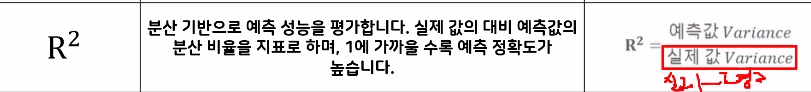
`1에 가까울수록 예측 정확도가 높다`

#### L1규제(Lasso)

In [134]:
from sklearn.linear_model import Lasso

In [135]:
lasso_model = Lasso() # 규제강도(알파) 기본값 - 1.0

In [136]:
lasso_model.fit(X_train, y_train)

C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.740e+03, tolerance: 3.044e+00
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [138]:
lasso_pre = lasso_model.predict(X_test)

In [139]:
# 평가 (mse, rmse, r2)
mse = mean_squared_error(lasso_pre, y_test)

rsme = mse ** 0.5

r2 = r2_score(lasso_pre, y_test)

print("Lasso mse :" , mse)
print("Lasso rmse :" , rmse)
print("Lasso r2 :" , r2)

Lasso mse : 17.38517355416838
Lasso rmse : 3.860095972257545
Lasso r2 : 0.76612581039864


### Ridge vs Lasso

In [140]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_coef_list = []
lasso_coef_list = []

for a in alpha_list :
    r_model = Ridge(alpha = a)
    l_model = Lasso(alpha = a)
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.70495e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+03, tolerance: 3.044e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+03, tolerance: 3.044e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\linear_model\_

In [141]:
ridge_coef_list # ridge 모델의 규제강도를 다르게 줌으로써 변경된 가중치 값들

[array([ 0.00000000e+00, -1.12638735e+01,  6.30042395e-01, -2.47854917e+00,
         2.09449364e+01,  2.03340789e+01,  8.93479337e+00,  8.87510334e-01,
        -1.17036030e+01,  9.16154120e-01, -4.36802570e-02,  3.51595051e+00,
         1.71618471e-01,  1.02082656e+00, -1.18191382e-03,  3.46890059e-01,
         3.99260353e-03,  2.24807288e+00, -1.93099320e+00,  1.17734974e-01,
        -5.73086753e-03, -2.57593105e-01, -3.71763521e-01,  1.93172120e-02,
         4.08461484e-01,  6.54678086e-05,  2.08580071e-02, -1.34788264e-04,
        -1.08158814e-03, -1.12898260e-01, -8.00779704e-01,  1.64430568e-02,
         2.87029273e-04, -1.47998742e-02, -8.81346559e-03,  5.45369642e-04,
        -1.53074131e-02, -3.14286104e-04, -5.05570030e-03,  3.41062290e-02,
        -3.02874400e-01,  1.40893219e+00,  1.80762547e-01,  3.28479882e-03,
         5.45609222e-02, -2.53494225e-02,  1.02925186e-03, -7.09777444e-02,
         2.05321522e-03, -1.22876969e-02,  2.09449364e+01, -2.69810469e+01,
        -2.8

In [142]:
lasso_coef_list # lasso 모델의 규제강도를 다르게 줌으로써 변경된 가중치 값들

[array([ 0.00000000e+00, -5.30174351e-01, -3.15674950e-01,  8.77979513e-01,
         9.76451368e+00, -0.00000000e+00,  6.32734585e+00,  1.74001350e-01,
         2.45382131e+00, -4.47839479e-01, -8.09889014e-03, -1.83958758e+00,
         5.97691223e-02,  6.31505097e-01, -1.04451694e-03,  1.99306934e-01,
         3.06214299e-02,  2.18698383e+00, -2.01343423e+00,  8.31091608e-02,
        -3.49631480e-03, -1.65983239e-01,  3.59553189e-02,  3.24724845e-04,
        -2.66658255e-03,  6.29841185e-05,  1.45185815e-02,  7.41545825e-04,
        -3.18534092e-04, -3.01682111e-02,  6.72229332e-03,  2.15116221e-02,
         1.44702923e-05, -1.47264146e-02, -7.76402120e-03,  3.81271161e-04,
         9.66411703e-03, -8.76397765e-05, -5.01420261e-03,  1.31677894e-02,
        -6.12169476e-02, -3.01259168e-02, -3.06123575e-02,  2.19539169e-03,
        -4.17593597e-02, -2.30852703e-02,  5.62754648e-04, -7.70248044e-02,
         1.44282232e-03, -2.53238629e-02,  0.00000000e+00, -1.69663452e+01,
        -4.8

In [146]:
# 데이퍼 프레임 형태로 변환
# ridge 회귀는 회귀계수 값이 0에 가까워지나 0이 될수는 없음
rid_df = pd.DataFrame(np.array(ridge_coef_list).T, columns = alpha_list) # .T -> 행과 열을 바꿔줌
rid_df

0.001      0.010     0.100     1.000     10.000    100.000   1000.000
0     0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1   -11.263874 -10.819218 -6.199076 -1.172396 -0.144969 -0.011805 -0.000239
2     0.630042   0.591480  0.375752  0.150186  0.026157 -0.089117 -0.025747
3    -2.478549  -2.097740 -1.648629 -0.815226 -0.111965  0.015466  0.006411
4    20.944936  14.581458  3.362199  0.395197  0.032789  0.001092 -0.000150
..         ...        ...       ...       ...       ...       ...       ...
100  -0.002145  -0.002160 -0.002561 -0.003222 -0.002761 -0.001689 -0.001734
101   0.009330   0.009698  0.012831  0.012060  0.004625  0.003524 -0.004045
102  -0.000019  -0.000019 -0.000019 -0.000017 -0.000019 -0.000024 -0.000025
103  -0.000765  -0.000778 -0.000750 -0.000594 -0.000460 -0.000320  0.000013
104   0.009697   0.009937  0.011256  0.014389  0.018150  0.023094  0.029099

[105 rows x 7 columns]

In [147]:
# 데이퍼 프레임 형태로 변환
# lasso 회귀는 회귀계수 값이 0이 될 수 있음
# L1규제는 규제강도(알파)가 커지면 특성 선택을 할 수 있다.
lasso_df = pd.DataFrame(np.array(lasso_coef_list).T, columns = alpha_list) # .T -> 행과 열을 바꿔줌
lasso_df

0.001     0.010     0.100     1.000     10.000    100.000   1000.000
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1   -0.530174 -0.453409  0.000000  0.000000 -0.000000 -0.000000 -0.000000
2   -0.315675 -0.334055 -0.242764 -0.000000 -0.000000  0.000000  0.000000
3    0.877980  0.779493  0.000000  0.000000  0.000000 -0.000000 -0.000000
4    9.764514  0.000000  0.000000 -0.000000  0.000000  0.000000  0.000000
..        ...       ...       ...       ...       ...       ...       ...
100  0.002193  0.001566  0.002336 -0.002005 -0.004740 -0.001827 -0.000000
101  0.002731  0.006521  0.001525 -0.003941 -0.000000  0.000000 -0.000000
102 -0.000027 -0.000025 -0.000029 -0.000033 -0.000033 -0.000035  0.000055
103 -0.000887 -0.000802 -0.000606 -0.000019 -0.000559 -0.000819 -0.001950
104  0.018156  0.019979  0.025369  0.034257  0.032617  0.007271  0.000000

[105 rows x 7 columns]

# 로지스틱회귀

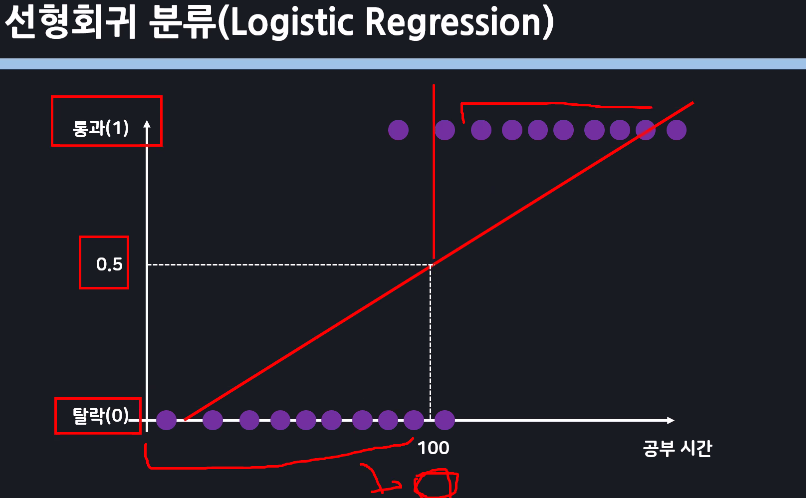
0과 1의 중앙값을 기준으로 탈락과 통과를 분류
단점 : 이상치 데이터에 너무 민감
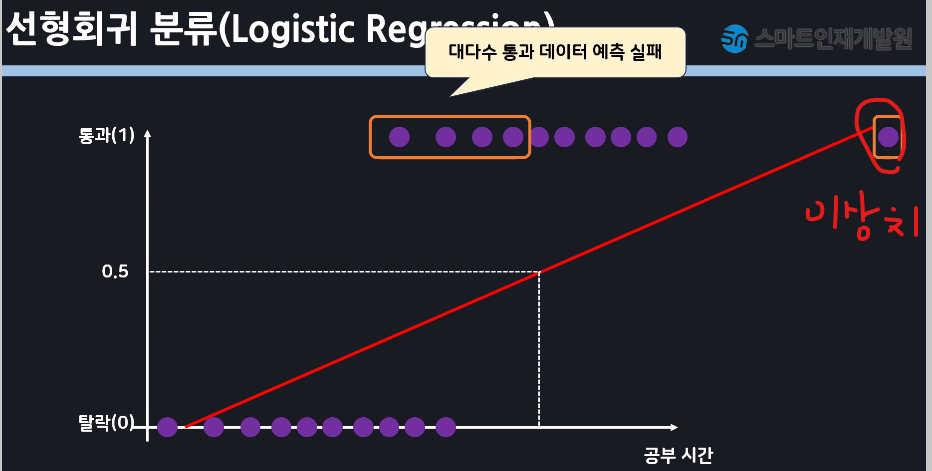
### 이러한 단점을 극복하기위해
## 로지스틱 회귀 사용 ( 이상치있어도 민감 X)
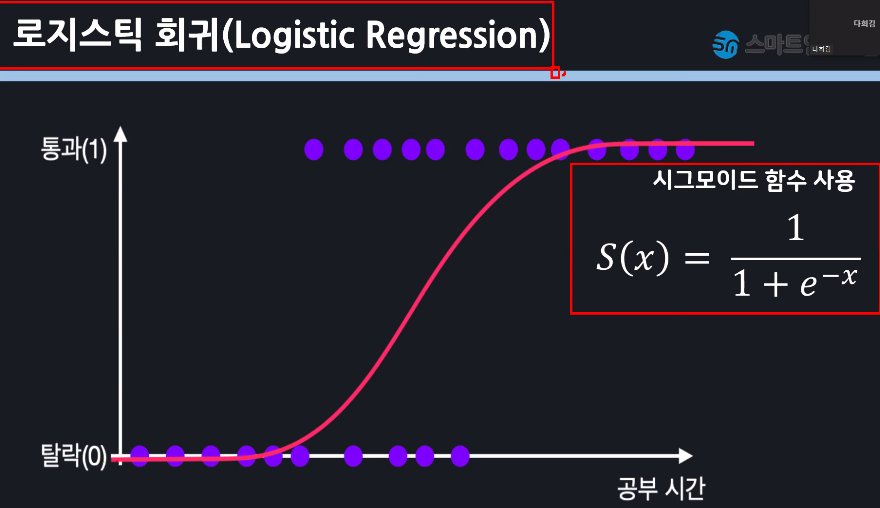
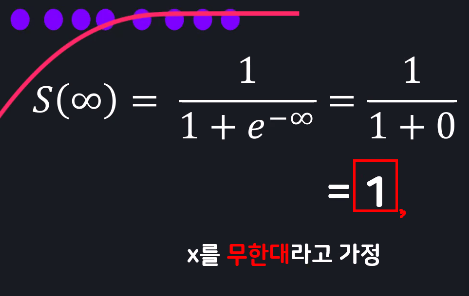
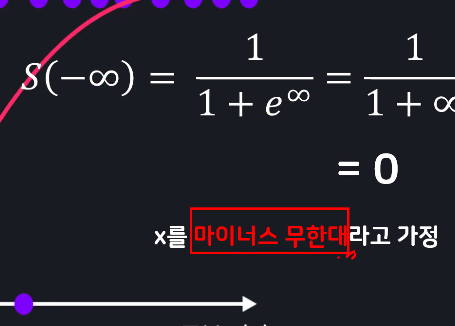
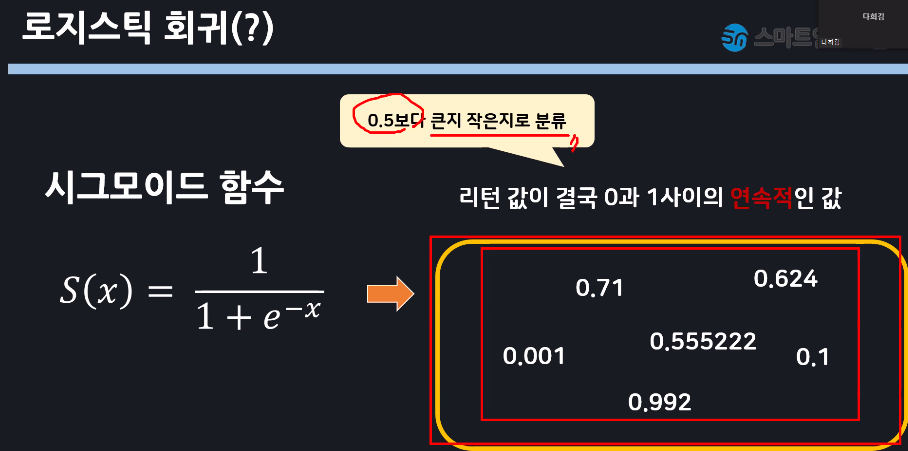
답데이터는 `분류` 인데, 왜 회귀라고 불리는지 ? -> `결과값은 연속적인 값이지만`, 0.5보다 작은지 큰지로 `분류` 
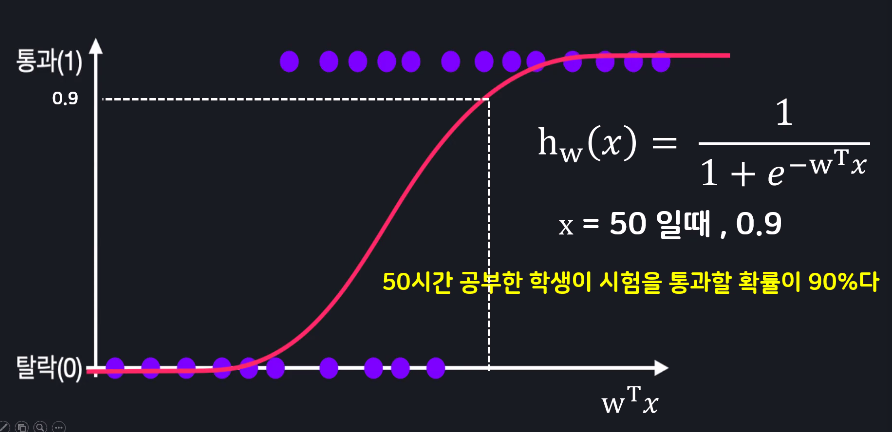
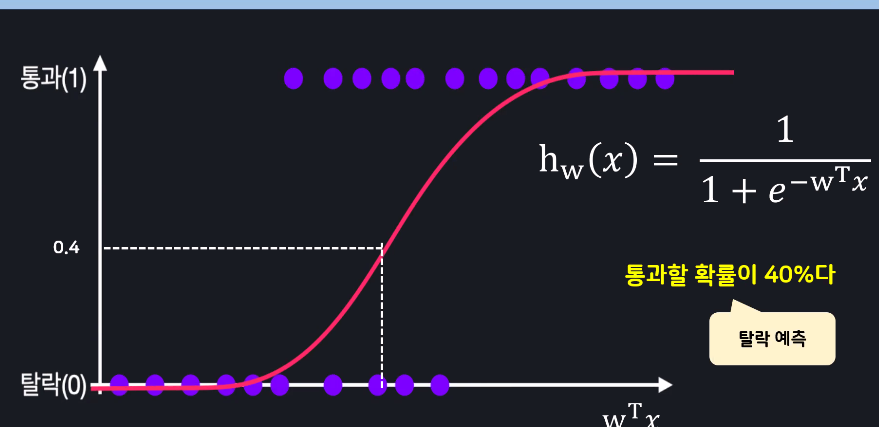

## 최적선을 정하는 기준이 필요  
- 선형회귀 -> MSE(손실함수)
- 로지스틱 회귀 -> 로그손실(log-loss / cross entropy)

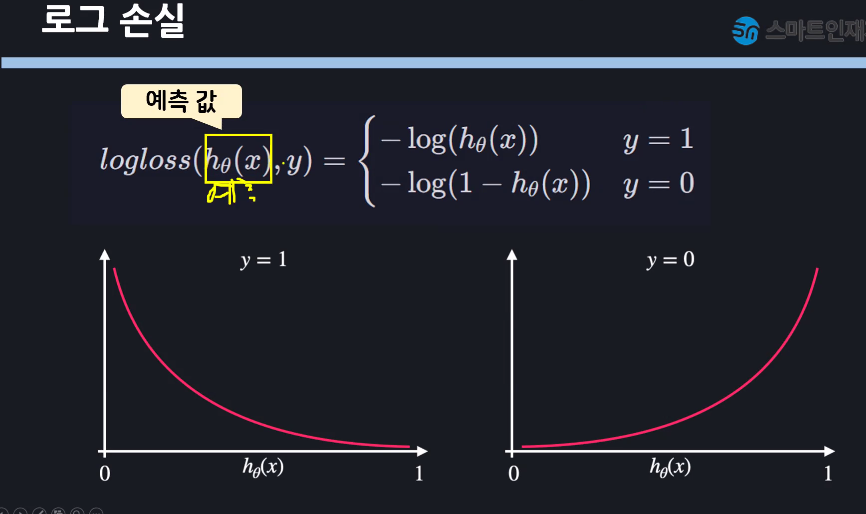
h(x) - 예측값  
y - 실제값    
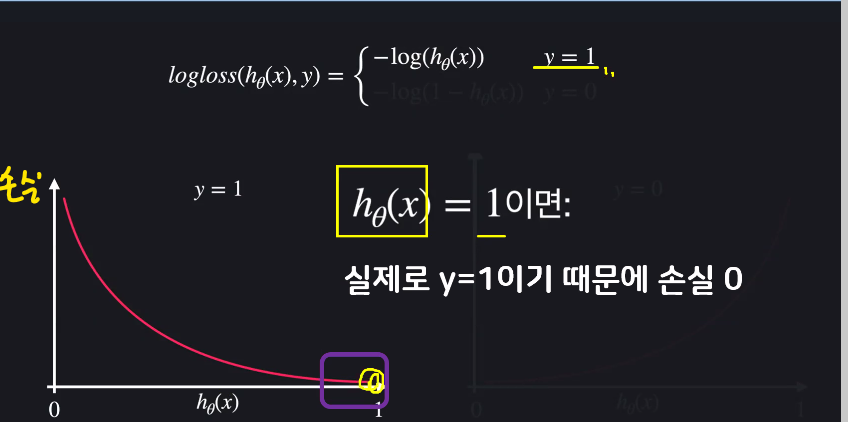  
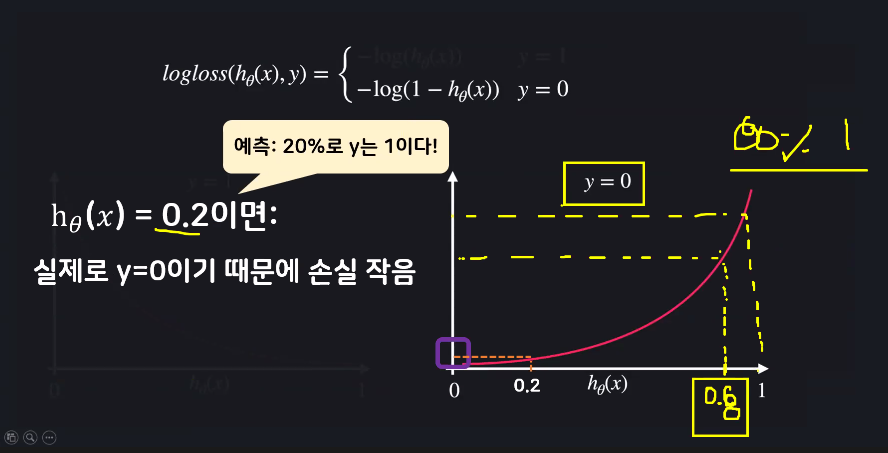